<a href="https://colab.research.google.com/github/berilerken/Iris_Dataset_ANN/blob/main/MODEL3_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries that we should import for the project
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torchsummary import summary

In [ ]:
#Reading the dataset
iris = pd.read_csv("/content/iris.csv")

In [ ]:
#Showing the first 5 with head()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#We should make mapping for the String values (we covert the String values into int values)
mappings = {
   'setosa': 0,
   'versicolor': 1,
   'virginica': 2
}
iris['species'] = iris['species'].apply(lambda x: mappings[x])

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = iris.drop('species', axis=1).values
y = iris['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Defining an Artifical Neural Network Model
class ANN(nn.Module):
  def __init__(self):
       super().__init__()
       self.fc1 = nn.Linear(in_features=4, out_features=16)
       self.fc2 = nn.Linear(in_features=16, out_features=24)
       self.fc3 = nn.Linear(in_features=24, out_features=18)
       self.fc4 = nn.Linear(in_features=18, out_features=20)
       self.fc5 = nn.Linear(in_features=20, out_features=22)
       self.fc6 = nn.Linear(in_features=22, out_features=12)
       self.output = nn.Linear(in_features=12, out_features=3)
       
 
  def forward(self, x):
     x1 = F.relu(self.fc1(x))
     x2 = F.relu(self.fc2(x1))
     x3 = F.relu(self.fc3(x2))
     x4 = F.relu(self.fc4(x3))
     x5 = F.relu(self.fc5(x4))
     x6 = F.relu(self.fc6(x5))
     x7 = F.relu(self.output(x6))
    
     return x7

In [ ]:
model = ANN()
print(model)


ANN(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=24, bias=True)
  (fc3): Linear(in_features=24, out_features=18, bias=True)
  (fc4): Linear(in_features=18, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=22, bias=True)
  (fc6): Linear(in_features=22, out_features=12, bias=True)
  (output): Linear(in_features=12, out_features=3, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

Epoch: 10 Loss: 1.0650649070739746
Epoch: 20 Loss: 0.7968859672546387
Epoch: 30 Loss: 0.5519797801971436
Epoch: 40 Loss: 0.4593226909637451
Epoch: 50 Loss: 0.4268331527709961
Epoch: 60 Loss: 0.40110182762145996
Epoch: 70 Loss: 0.3962249755859375
Epoch: 80 Loss: 0.38990333676338196
Epoch: 90 Loss: 0.3905678391456604
Epoch: 100 Loss: 0.3994538486003876


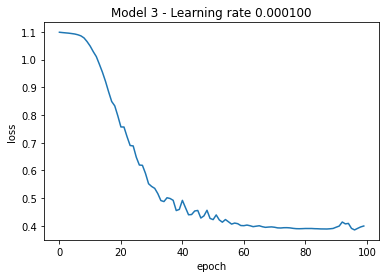

CPU times: user 353 ms, sys: 19.5 ms, total: 373 ms
Wall time: 577 ms


In [ ]:
%%time
epochs = 100
loss_arr = []
epochs_x = []
learning_rate = 0.0001

for i in range(epochs):
   y_hat = model.forward(X_train)
   loss = criterion(y_hat, y_train)
   loss_np = loss.item()
   loss_arr.append(loss_np)
   epochs_x.append(i)

 
   if (i+1) % 10 == 0:
       print(f'Epoch: {i+1} Loss: {loss}')
 
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

# print(len(epochs_x))

plt.plot(epochs_x, loss_arr)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Model 3 - Learning rate %f"%(learning_rate))
plt.show()

In [ ]:
preds = []
with torch.no_grad():
   for val in X_test:
       y_hat = model.forward(val)
       preds.append(y_hat.argmax().item())

print(preds)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]


In [ ]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df.head()

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,2,2,1
3,1,1,1
4,1,1,1


In [ ]:
df['Correct'].sum() / len(df)

1.0